## Example of using RV Data from 2 different instruments

In [1]:
#We import the necessary libraries.
%matplotlib inline

In [2]:
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from importlib import reload

In [4]:
import corner

In [5]:
import radvel

In [6]:
#We first get the data of TOI-762 A.
data = pd.read_csv('../../data/rvdata/TOI-2379.csv')

data

t        rv  rv_err instrument
0   2.459498e+06  27801.60    9.47   ESPRESSO
1   2.459501e+06  26881.81    5.37   ESPRESSO
2   2.459520e+06  27865.79    5.75   ESPRESSO
3   2.459521e+06  28547.72    3.77   ESPRESSO
4   2.459522e+06  28423.49    3.03   ESPRESSO
5   2.459528e+06  27157.53    3.16   ESPRESSO
6   2.459529e+06  26873.69    3.32   ESPRESSO
7   2.459472e+06    162.90   12.04        PFS
8   2.459472e+06     94.83   13.99        PFS
9   2.459472e+06    223.48   15.28        PFS
10  2.459476e+06   -332.64   26.50        PFS
11  2.459532e+06     -8.95   11.86        PFS
12  2.459532e+06     56.76   12.61        PFS
13  2.459532e+06      0.00   12.18        PFS
14  2.459535e+06  -1476.56   11.39        PFS
15  2.459535e+06  -1467.28   10.24        PFS
16  2.459535e+06  -1424.81   10.92        PFS

In [7]:
#This time we have 2 instruments.
#For that reason, we need to separate the data points depending on the instruments that they were taken with.

#ESPRESSO RV Data
t1 = data[data['instrument'] == 'ESPRESSO']['t'].values
rv1 = data[data['instrument'] == 'ESPRESSO']['rv'].values
e_rv1 = data[data['instrument'] == 'ESPRESSO']['rv_err'].values

#PFS RV Data
t2 = data[data['instrument'] == 'PFS']['t'].values
rv2 = data[data['instrument'] == 'PFS']['rv'].values
e_rv2 = data[data['instrument'] == 'PFS']['rv_err'].values

In [8]:
#Now we import the GaiaRV source codes.
import sys
sys.path.insert(0, '../../gaiafit/')
try:
    sys.path.remove('\\wsl.localhost\\Ubuntu\\home\\kayahan')
except Exception as e:
    print(e)

#We import utils.py, gaiafit.py, gaiasource.py as follows.
import utils
import gaiafit
import gaiasource
reload(gaiafit)

gaiafit, gaiasource, utils

list.remove(x): x not in list


(<module 'gaiafit' from '/home/kayahan/ExoSoft/notebooks/rv-tests/../../gaiafit/gaiafit.py'>,
 <module 'gaiasource' from '/home/kayahan/ExoSoft/notebooks/rv-tests/../../gaiafit/gaiasource.py'>,
 <module 'utils' from '/home/kayahan/ExoSoft/notebooks/rv-tests/../../gaiafit/utils.py'>)

In [9]:
#We load the Prior file for our target.
f = '../../data/priors/TOI2379_Priors.txt'
reload(gaiafit)

<module 'gaiafit' from '/home/kayahan/ExoSoft/notebooks/rv-tests/../../gaiafit/gaiafit.py'>

In [10]:
#We then use "LPFunctionRVOnly2" from the "gaiafit.py" code to do the fitting.
    #LPFunction => Likelihood Function
    #RVOnly => Tells you that it is only doing RV analysis, not Gaia Astrometric Analysis.
    #2 => Stands for 2 instruments.

#Note that LPFunctionRVOnly2 plots the Priors.
L = gaiafit.LPFunctionRVOnly2(t1,rv1,e_rv1,t2,rv2,e_rv2,file_priors=f)

#We do a Gaia Fit for RV Only as follows. (Needs the Likelihood Function to work)
TF = gaiafit.GaiaFitRVOnly(L)

Reading in priorfile from ../../data/priors/TOI2379_Priors.txt
   prior          arg1        arg2        label  description priortype  fixed
0     NP  6.450000e-01    0.033000        mstar        mstar     model  False
1     NP  5.760000e+00    0.200000           mp           mp     model  False
2     NP  5.469383e+00    0.000002         P_p1         P_p1     model  False
3     NP  2.459402e+06    0.000160        tp_p1        tp_p1     model  False
4     UP  0.000000e+00    0.500000       ecc_p1       ecc_p1     model  False
5     UP  0.000000e+00  360.000000     omega_p1     omega_p1     model  False
6     NP  5.263000e-02    0.000910         a_p1         a_p1     model  False
7     NP  1.002500e+03    6.300000         K_p1         K_p1     model  False
8     NP  2.771890e+04    5.100000       gamma1       gamma1     model  False
9     NP -8.160000e+02   54.000000       gamma2       gamma2     model  False
10    NP  0.000000e+00   17.000000    sigma_rv1    sigma_rv1     model  False
1

In [11]:
#We do the Minimization using PyDE as follows.
#Note that the Minimization includes the MCMC i.e. the Parameter Space exploration.
TF.minimize_PyDE(de_iter=200,mc_iter=2000,)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
       labels       centers         lower         upper            pv  center_dist
0       mstar  6.450000e-01  4.800000e-01  8.100000e-01  6.303573e-01     0.014643
1          mp  5.760000e+00  4.760000e+00  6.760000e+00  5.873296e+00    -0.113296
2        P_p1  5.469383e+00  5.469371e+00  5.469394e+00  5.469385e+00    -0.000002
3       tp_p1  2.459402e+06  2.459402e+06  2.459402e+06  2.459402e+06    -0.000045
4      ecc_p1  2.500000e-01  0.000000e+00  5.000000e-01  3.411193e-01    -0.091119
5    omega_p1  1.800000e+02  0.000000e+00  3.600000e+02  7.254827e+01   107.451734
6        a_p1  5.263000e-02  4.808000e-02  5.718000e-02  5.258161e-02     0.000048
7        K_p1  1.002500e+03  9.710000e+02  1.034000e+03  1.002073e+03     0.427411
8      gamma1  2.771890e+04  2.769340e+04  2.774440e+04  2.771912e+04    -0.220885
9      gamma2 -8.160000e+02 -1.086000e+03 -5.460000e+02 -8.101156e+02    -5.884411
10  sigma_rv1  0.000000e+

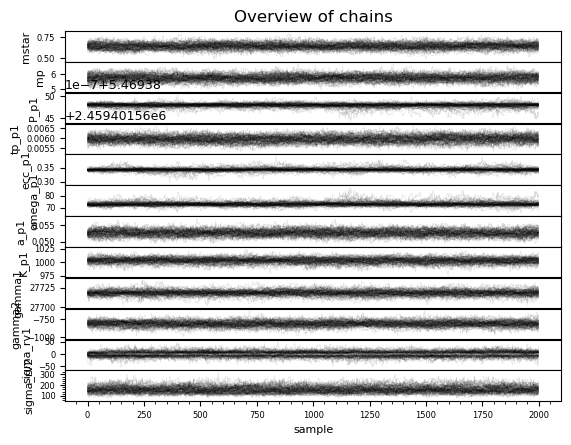

In [12]:
#We import mcmc_help.
import mcmc_help

#We use the plot_chains function to plot the chains as follows.
mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

plt.show();

In [13]:
#We define the burn in index to be 1000.
#This means that the first 1000 samples per chain will be ignored.
burnin_index = 1000

#We extract the chains after the burn in phase. (?)
    #First part: We take all the chains.
    #Second part: We ignore the first 1000 samples per chain. (hence "burnin_index")
    #Third part: We take all the parameters.
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]

#We then flatten the chains as follows.
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))

#To store the posteriors we have obtained from the chains, we define a Pandas DataFrame as follows.
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)

df_post

mstar        mp      P_p1         tp_p1    ecc_p1   omega_p1  \
0      0.626595  5.315900  5.469385  2.459402e+06  0.341894  71.933655   
1      0.626595  5.315900  5.469385  2.459402e+06  0.341894  71.933655   
2      0.626595  5.315900  5.469385  2.459402e+06  0.341894  71.933655   
3      0.631632  5.441847  5.469385  2.459402e+06  0.341839  72.250322   
4      0.631632  5.441847  5.469385  2.459402e+06  0.341839  72.250322   
...         ...       ...       ...           ...       ...        ...   
99995  0.639850  5.342903  5.469385  2.459402e+06  0.342341  73.950865   
99996  0.637246  5.403528  5.469385  2.459402e+06  0.343279  73.721307   
99997  0.637246  5.403528  5.469385  2.459402e+06  0.343279  73.721307   
99998  0.637520  5.402190  5.469385  2.459402e+06  0.343038  73.863052   
99999  0.637520  5.402190  5.469385  2.459402e+06  0.343038  73.863052   

           a_p1         K_p1        gamma1      gamma2  sigma_rv1   sigma_rv2  
0      0.050911  1004.159992  27720.668578 -844.978740   3.724529  126.724707  
1      0.050911  1004.159992  27720.668578 -844.978740   3.724529  126.724707  
2      0.050911  1004.159992  27720.668578 -844.978740   3.724529  126.724707  
3      0.051233  1004.513442  27719.969685 -832.106218   1.810587  136.860227  
4      0.051233  1004.513442  27719.969685 -832.106218   1.810587  136.860227  
...         ...          ...           ...         ...        ...         ...  
99995  0.053025  1000.123619  27722.172975 -850.480149  11.383088  179.828316  
99996  0.052960  1000.635745  27721.396915 -853.895526   9.080881  174.865390  
99997  0.052960  1000.635745  27721.396915 -853.895526   9.080881  174.865390  
99998  0.053034  1000.005948  27721.720255 -863.766588   9.057490  177.639997  
99999  0.053034  1000.005948  27721.720255 -863.766588   9.057490  177.639997  

[100000 rows x 12 columns]

In [14]:
#We print out the median values as follows.
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals[['Labels','values']]

Labels                                     values
0      mstar                  $0.645_{-0.032}^{+0.033}$
0         mp                     $5.77_{-0.20}^{+0.19}$
0       P_p1  $5.469384801_{-0.00000004}^{+0.00000003}$
0      tp_p1      $2459401.56597_{-0.00017}^{+0.00016}$
0     ecc_p1               $0.3428_{-0.0042}^{+0.0044}$
0   omega_p1                       $72.9_{-1.1}^{+1.4}$
0       a_p1             $0.0526_{-0.00090}^{+0.00095}$
0       K_p1                     $1003.1_{-4.8}^{+4.4}$
0     gamma1                    $27718.6_{-3.1}^{+3.0}$
0     gamma2                   $-815.0_{-34.0}^{+35.0}$
0  sigma_rv1                       $2.3_{-13.0}^{+9.1}$
0  sigma_rv2                    $157.0_{-26.0}^{+32.0}$

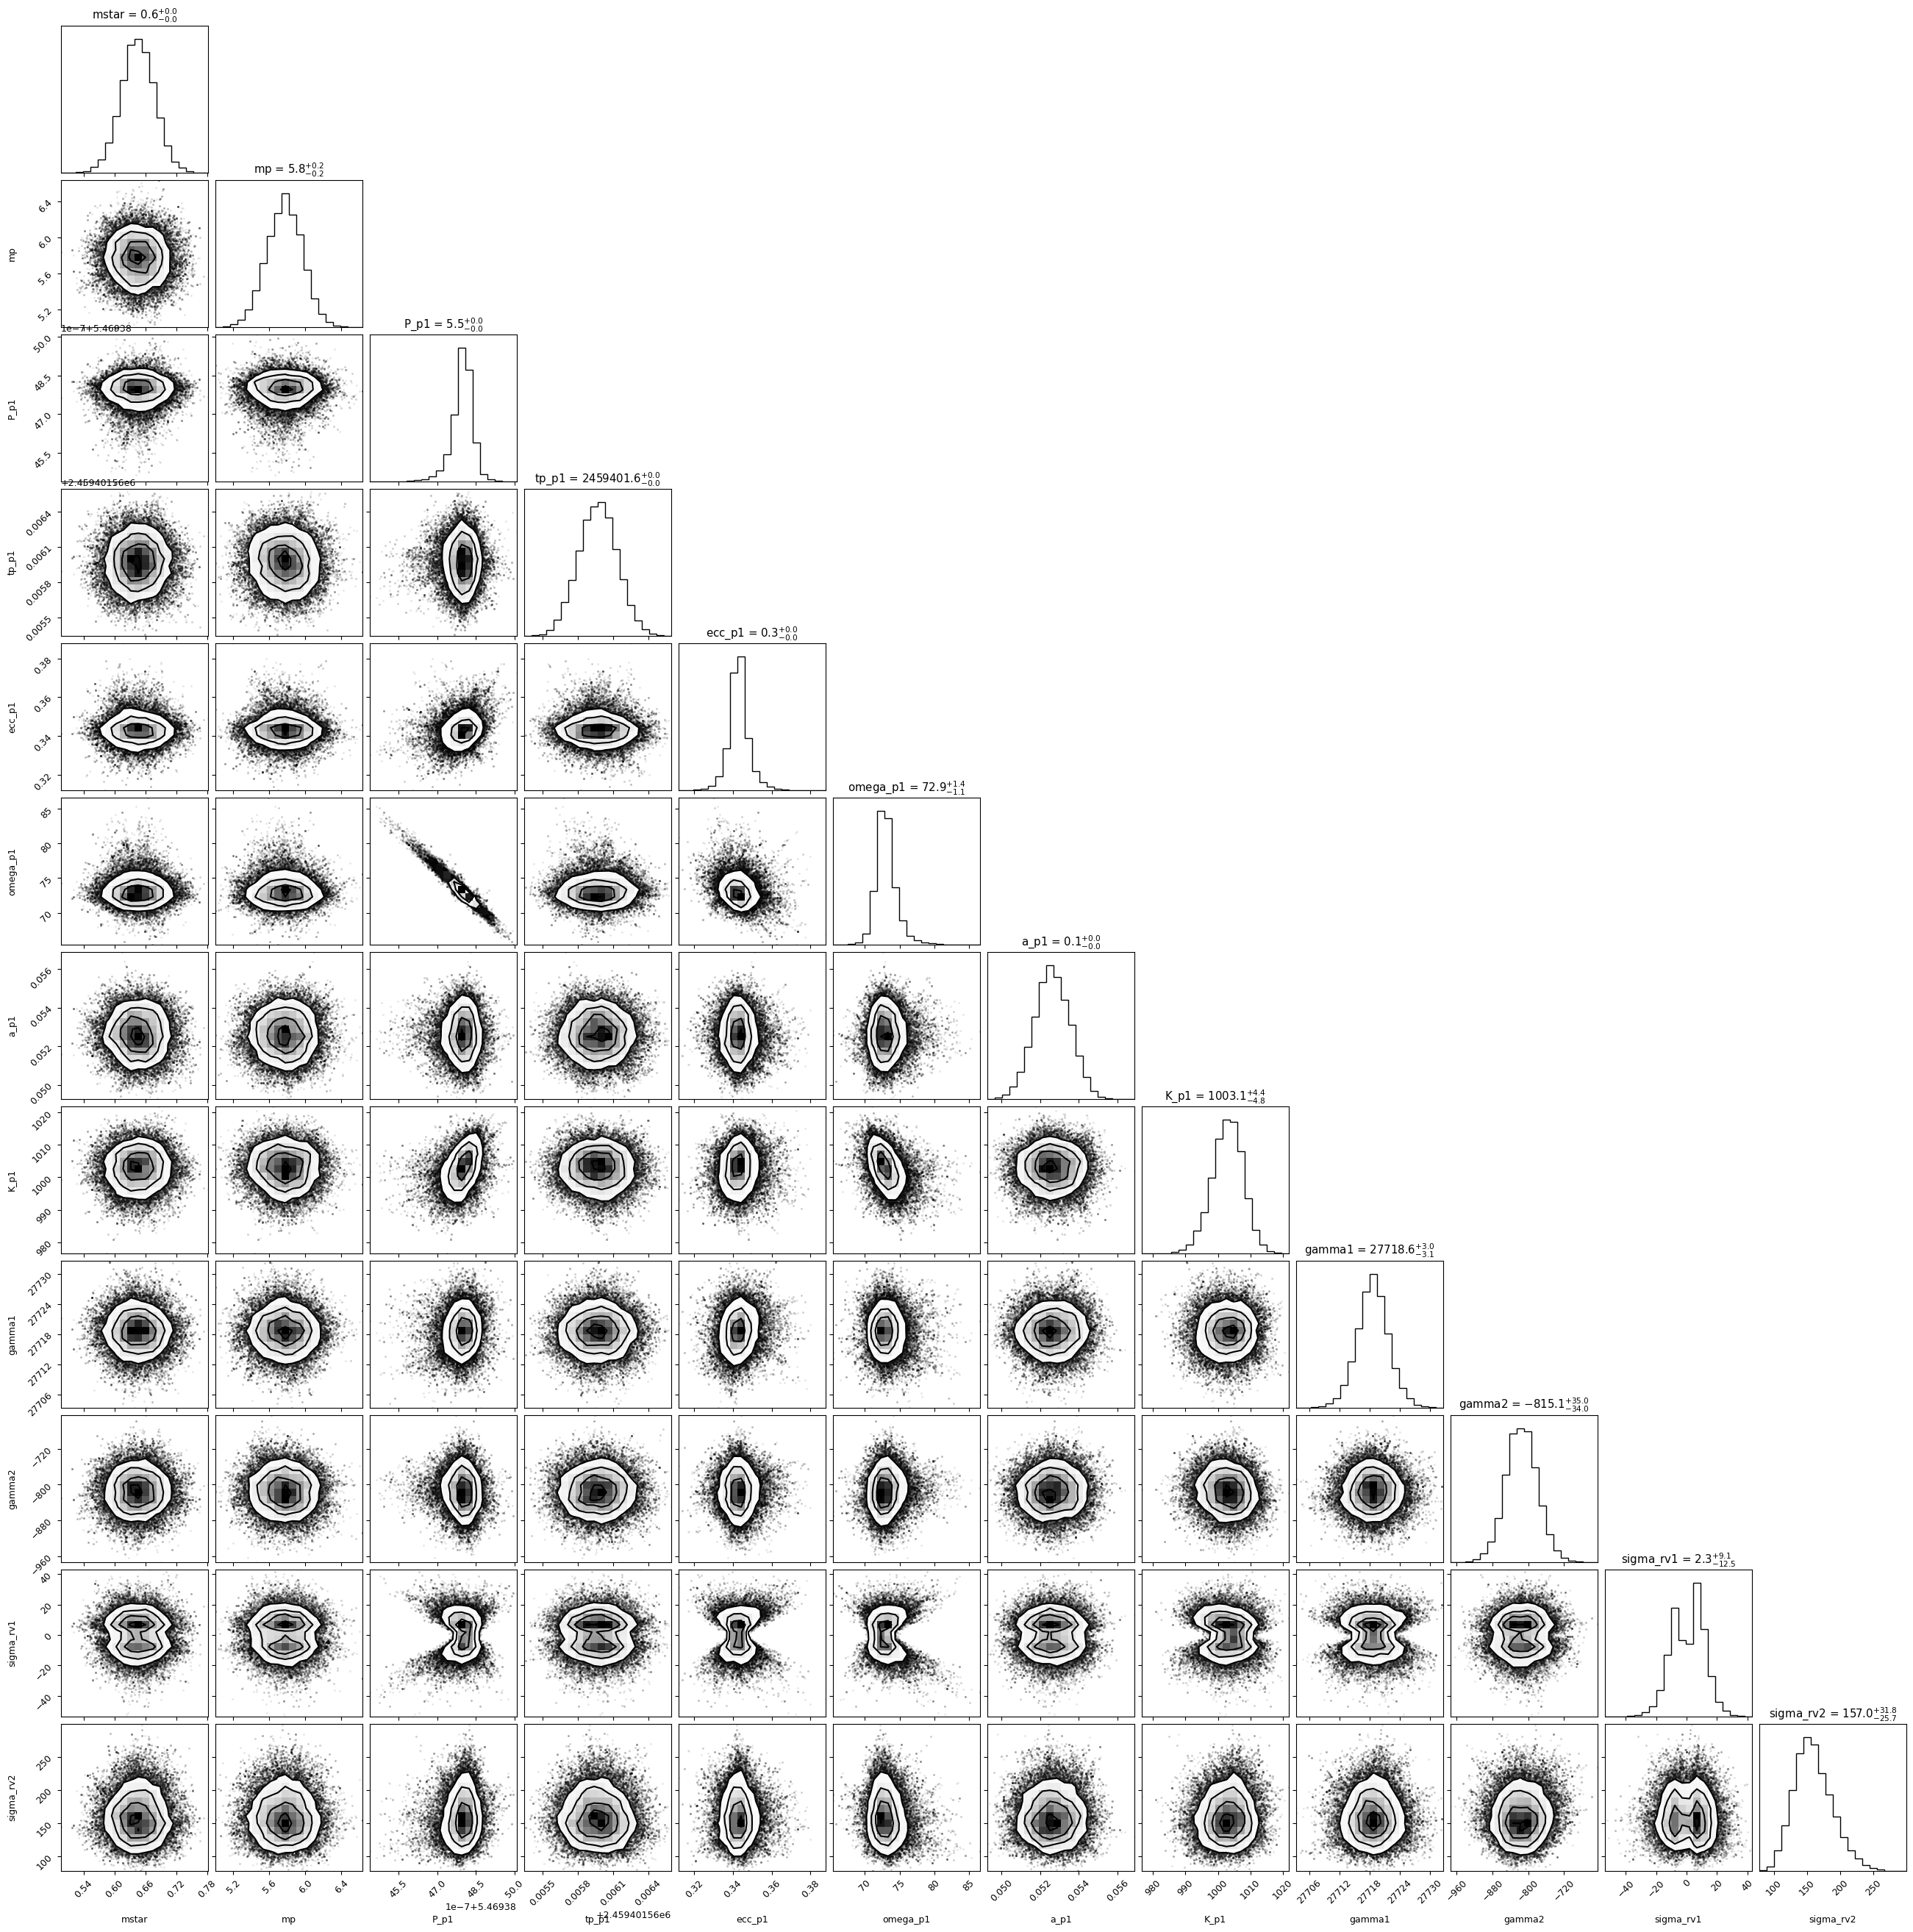

In [15]:
#We then plot the Corner Plot.
import corner
corner.corner(df_post.values,
       show_titles=True,labels=list(df_post.columns),title_fmt='.1f',xlabcord=(0.5, -0.2));

plt.show();

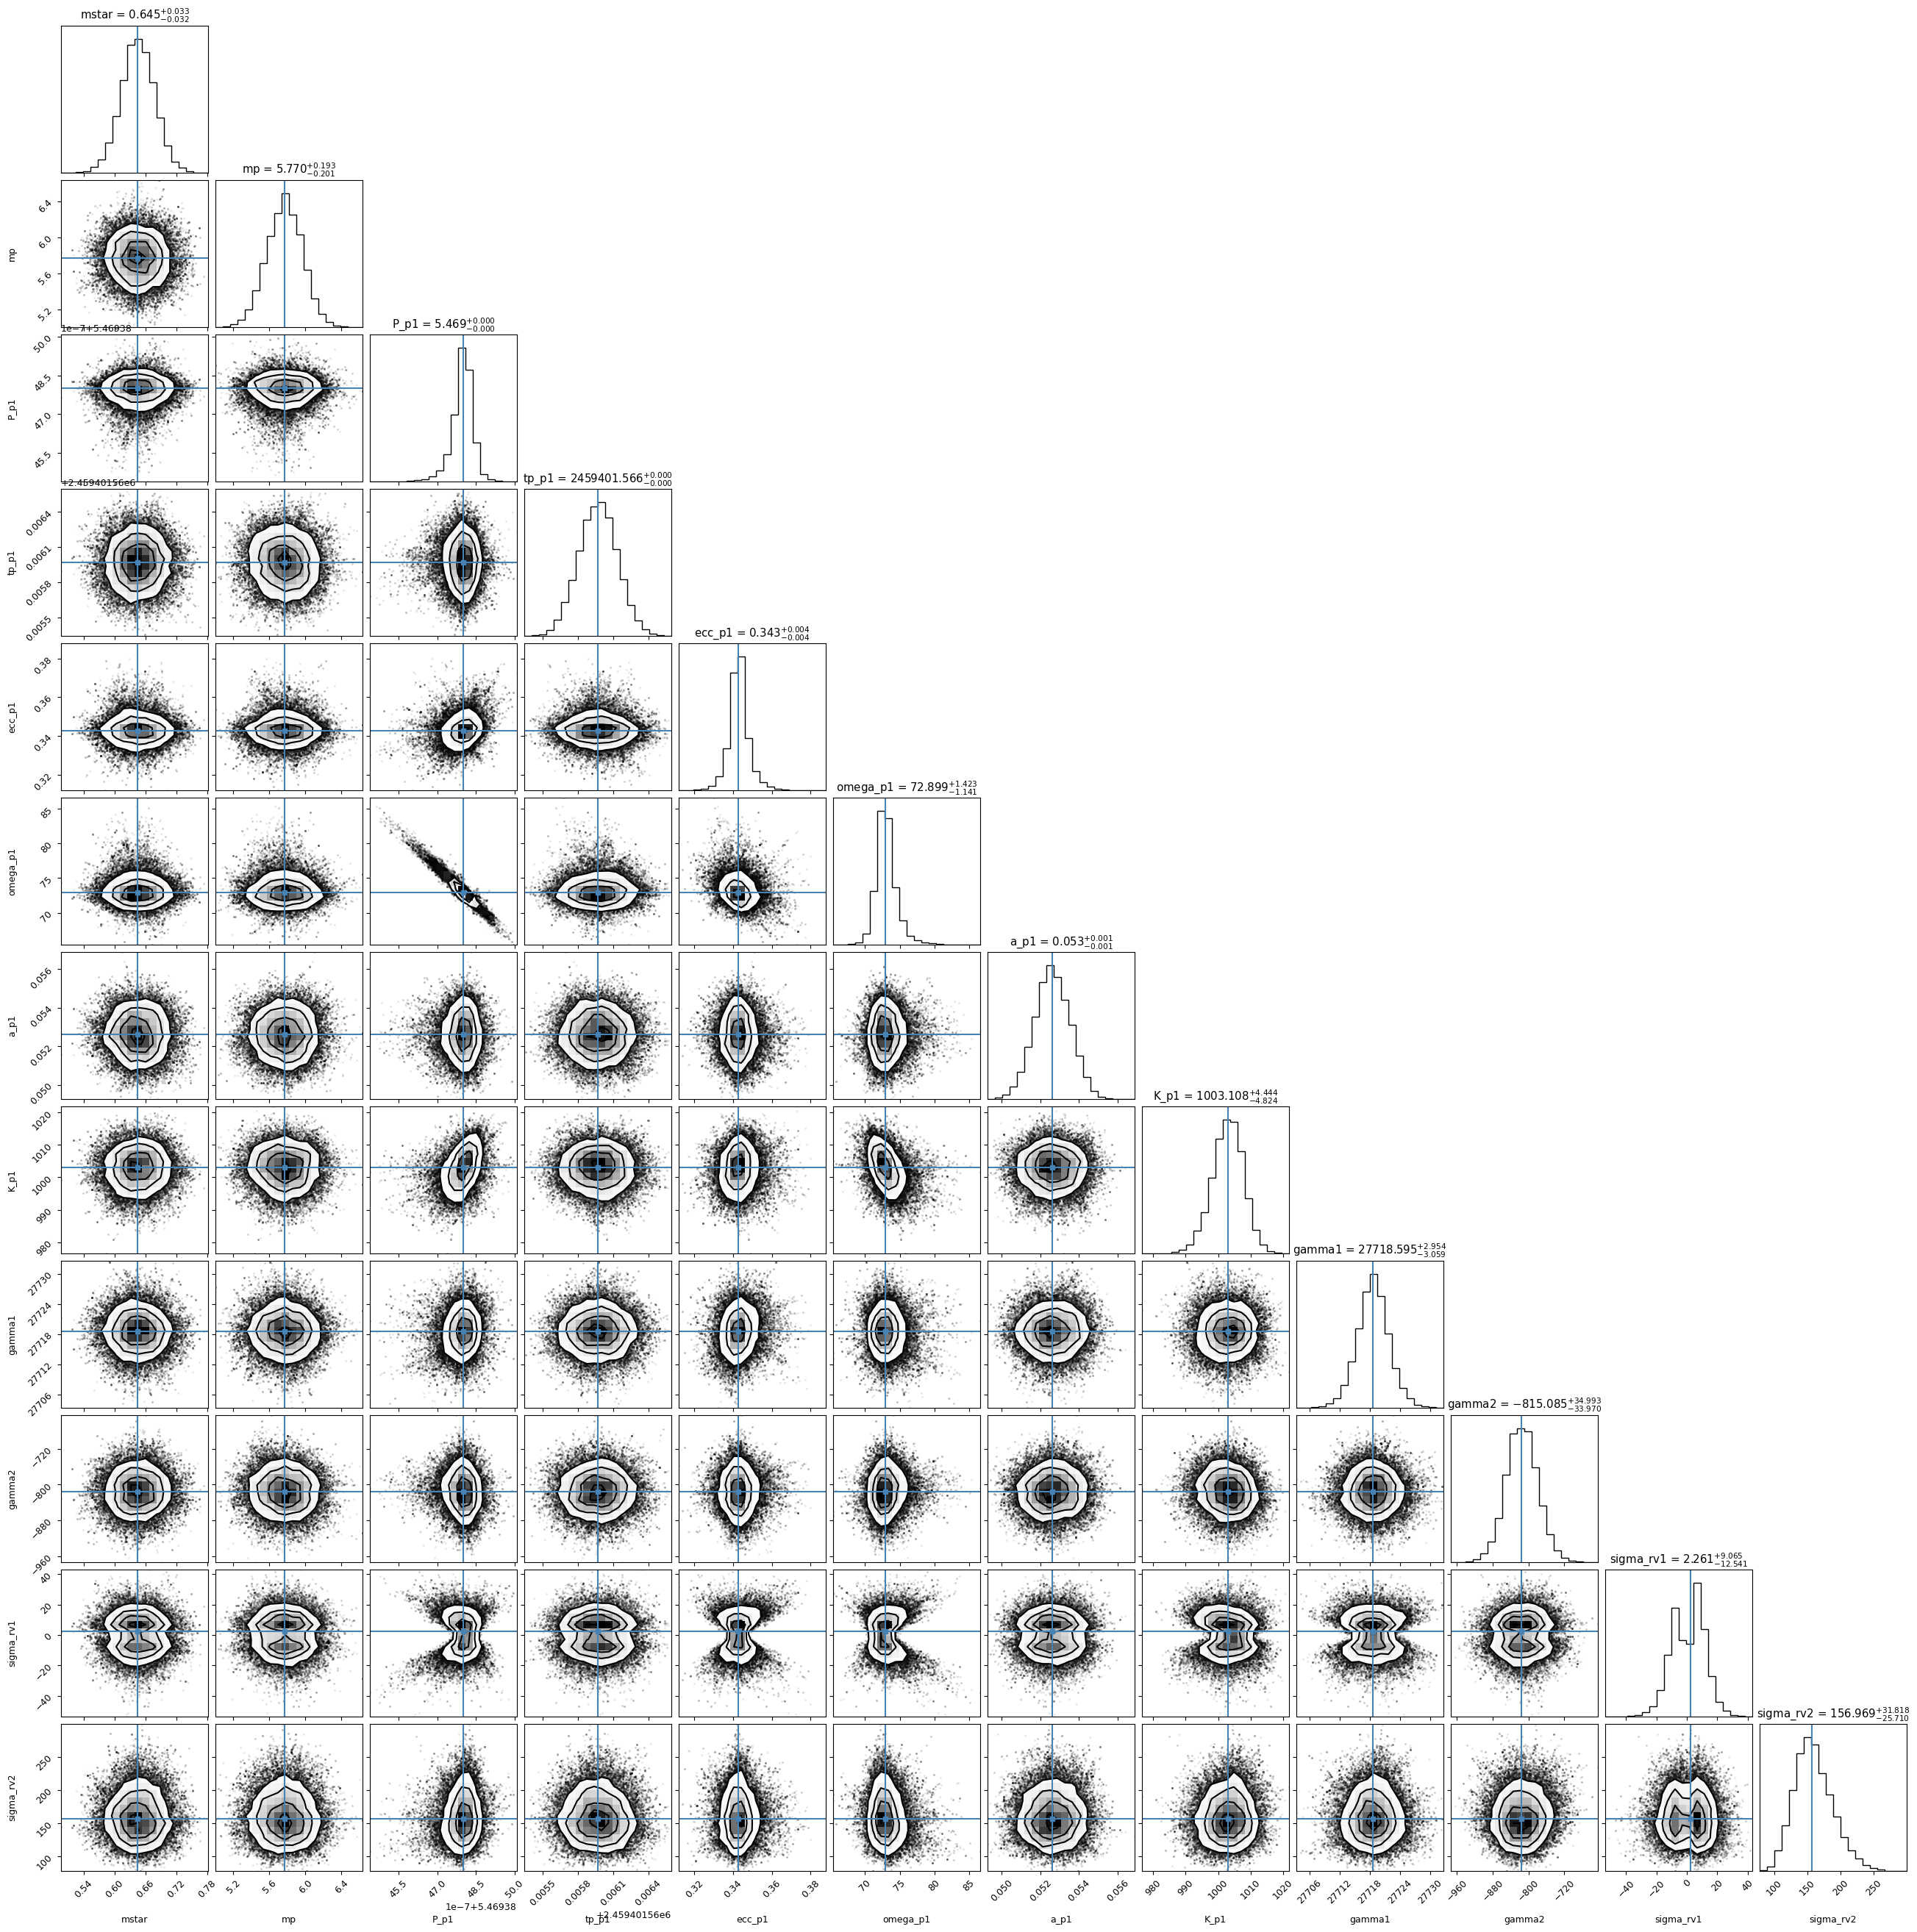

In [16]:
#We again plot the Corner plot but this time with the Truths included to compare them with the values we have obtained from MCMC.
import corner
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
corner.corner(df_post.values,truths=pv_50,
       show_titles=True,labels=list(df_post.columns),title_fmt='.3f',xlabcord=(0.5, -0.2));

plt.show();

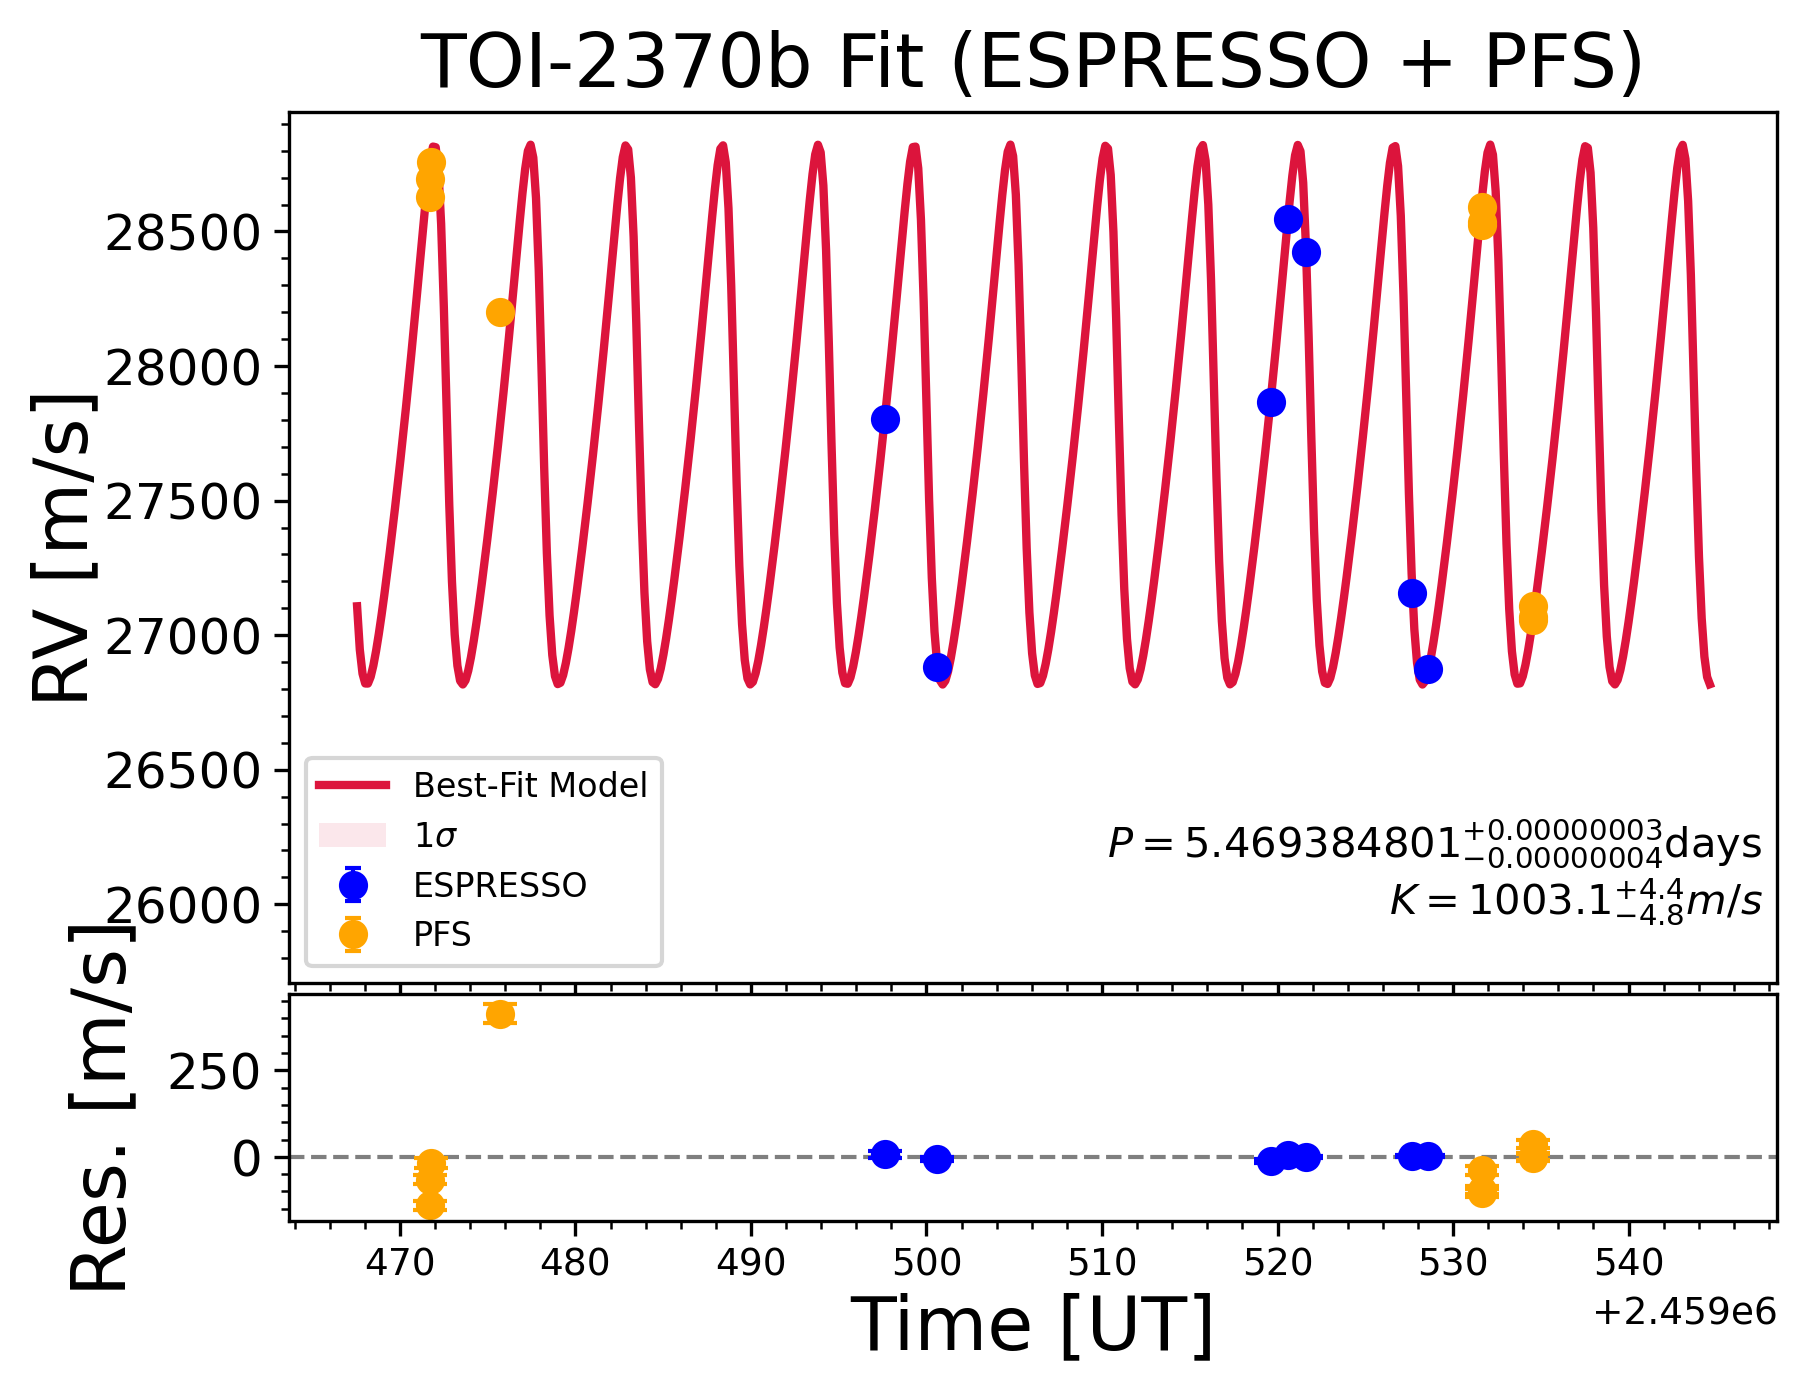

In [35]:
#We import astropy.time to convert Julian Dates into Datetimes i.e. the DD-MM-YYYY Format.
import astropy.time

#We define a function that turns Julian Dates into Datetime format.
def jd2datetime(times):
    return times
    #return np.array([astropy.time.Time(time,format="jd",scale="utc").datetime for time in times])

#We define the Title, Number of Models and the Shade color.
TITLE = 'TOI-2370b Fit (ESPRESSO + PFS)'
NUMMODELS = 5000
shadecolor="black"

###################
#We define the times using the JD Times from the first and second dataset.
#Note that we define 500 time points.
times1 = np.linspace(TF.lpf.data['x1'][0]-0.05,TF.lpf.data['x2'][-1]+0.05,500)

#We define the 50th Percentile i.e. the Median by using the Flatchain we defined.
#The "[0]" is to get the percentiles out of the array and turn it into a list.
pv_50 = np.percentile(flatchain,[50],axis=0)[0]

#We define times for the model/fit this time, using the minimum and maximum times.
#Note that we define 300 time points for the fit.
t1_mod = np.linspace(times1.min()-30,times1.max()+10,500)

#Our goal is to get the Residuals i.e. Data - Model.
#For that first we compute the Radial Velocities for both instruments using 50th percentiles i.e. the Model.
rv_501, rv_502 = TF.lpf.compute_total_model(pv_50,t1_mod,t1_mod)

#Then we get the Radial Velocities for both instruments using the datafiles we have i.e. Data.
rv_50_obs1, rv_50_obs2 = TF.lpf.compute_total_model(pv_50,TF.lpf.data['x1'],TF.lpf.data['x2'])

#We calculate the residuals for both instruments.
res1 = TF.lpf.data['y1'] - rv_50_obs1
res2 = TF.lpf.data['y2'] - rv_50_obs2

#We define the Figure and the Axes.
#Note that we have two rows with one of them showing the RV and the other one showing the Residuals.
fig, (ax,bx) = plt.subplots(dpi=300,nrows=2,gridspec_kw={'height_ratios': [5,1.3]},sharex=True)

#################
# Plot data
#################
#We first plot the Best-Fit Model.
#For that we first define a label.
label = r'Best-Fit Model'

#Then we also add the values of Period and Eccentricity into our label.
#Note that we are using "df_medvals" we found after MCMC.
#Note that we can also add Planet Mass and Inclination by removing "#" from the lines below.
lab = '$P=${}'.format(df_medvals[df_medvals.Labels=='P_p1']['values'].values[0])+'days\n'
#lab += r'$M_p=${}$M_E$'.format(earth_mass)+'\n'
#lab += r'$e=${}'.format(df_medvals[df_medvals.Labels=='ecc_p1']['values'].values[0])+'\n'
lab += r'$K=${}$m/s$'.format(df_medvals[df_medvals.Labels=='K_p1']['values'].values[0])+'\n'

#We define the marker color to be black for errorbars.
markercolor="blue"

#We define the errorbars & datapoints.
#Note that we put times into the jd2datetime function so that the dates turn from JD to Datetime.
ax.errorbar(jd2datetime(TF.lpf.data['x1']),TF.lpf.data['y1'],TF.lpf.data['error1'],
            marker='o',elinewidth=1,capsize=2,lw=0,mew=1,color=markercolor,markersize=6,label='ESPRESSO')

#We define the errorbars & datapoints for the second dataset from the second instrument.
#We again put times into the jd2datetime function so that the dates turn from JD to Datetime.
ax.errorbar(jd2datetime(TF.lpf.data['x2']),TF.lpf.data['y2']-TF.lpf.get_jump_parameter_value(pv_50,'gamma2')+TF.lpf.get_jump_parameter_value(pv_50,'gamma1'),TF.lpf.data['error2'],
            marker='o',elinewidth=1,capsize=2,lw=0,mew=1,color="orange",markersize=6,label='PFS')

#We finally also plot our model as follows.
ax.plot(jd2datetime(t1_mod),rv_501,color="crimson",label=label,lw=2.,zorder=-10)

#Now we work on the second Row for the Resiudal graph.
#We also need to plot the residuals with the error bars included.

#For that we define the errorbars & datapoints for the first dataset from first instrument.
bx.errorbar(jd2datetime(TF.lpf.data['x1']),res1,TF.lpf.data['error1'],
            marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=markercolor,markersize=6)

#We define the errorbars & datapoints for the second dataset from the second instrument.
bx.errorbar(jd2datetime(TF.lpf.data['x2']),res2,TF.lpf.data['error2'],
            marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color="orange",markersize=6)

#We add the values of our Parameters to the Bottom-Right of our first Graph i.e. RV Graph.
ax.text(0.99,0.01,lab,va='bottom',ha='right',fontsize=10,transform=ax.transAxes)

#We define a list to sample from our model, which we will use for Sigma Errors of our Fit.
mmodel1 = []
for i in range(NUMMODELS):
    #if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1, m2 = TF.lpf.compute_total_model(flatchain[idx],times1=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)

#We then show the 1-Sigma Error of our fit as follows.
#There are also options for 2-Sigma and 3-Sigma Errors, commented below.
ax.fill_between(jd2datetime(t1_mod),np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color='crimson',lw=0,label='1$\sigma$',zorder=-1)

#We show define the legend for the first row i.e. the RV Graph.
ax.legend(loc='lower left',fontsize=8)

#We define the x-axis and y-axis labels for the second row i.e. the Residuals Graph.
bx.set_xlabel('Time [UT]',labelpad=2,fontsize=18)
bx.set_ylabel('Res. [m/s]',labelpad=6,fontsize=18)

#We also define the x-axis of the first row i.e. the RV Graph.
ax.set_ylabel('RV [m/s]',labelpad=0,fontsize=18)

#We then define the x limit by using ax.get_xlim()
xlim = ax.get_xlim()

#Using the x limits we define the new xlim to be the first and second element of the xlim array.
ax.set_xlim(xlim[0],xlim[1])

#We define extra times to plot the zero-line for Residuals.
_x = np.linspace(xlim[0],xlim[-1],100)

#We use the extra times we defined to plot the zero-line for residuals.
bx.plot(_x,0*np.ones(100),color='black',ls='--',lw=1,alpha=0.5,zorder=-10)

#We then set a 0.02 horizontal space between the rows. (Tighter than the default setup.)
fig.subplots_adjust(hspace=0.02)

for xx in [ax,bx]:
    utils.ax_apply_settings(xx)
    xx.grid(lw=0)

bx.tick_params(axis='x',labelsize=9)
ax.set_title(TITLE,fontsize=18)#,y=1.05)

ylim = ax.get_ylim()
ax.set_ylim(ylim[0]-1000, ylim[-1]+10)

#plt.savefig("toi_2431.png", dpi = 500)
plt.show();